In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the data

In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
label_mapping = {0:'setosa', 1:'versicolor', 2:'virginica'}

# EDA

### Sepal length

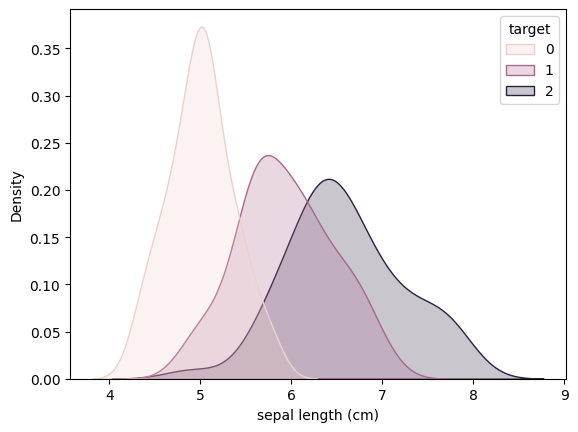

In [5]:
sns.kdeplot(data=df, x="sepal length (cm)", hue="target", fill=True);

#### Sepal Width

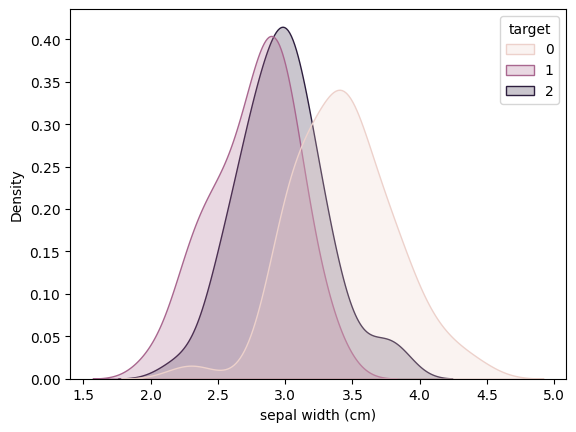

In [6]:
sns.kdeplot(data=df, x="sepal width (cm)", hue="target", fill=True);

### Petal Length

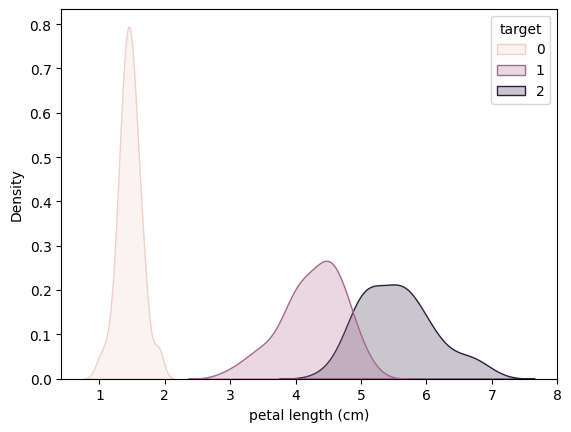

In [7]:
sns.kdeplot(data=df, x="petal length (cm)", hue="target", fill=True);

### Petal width

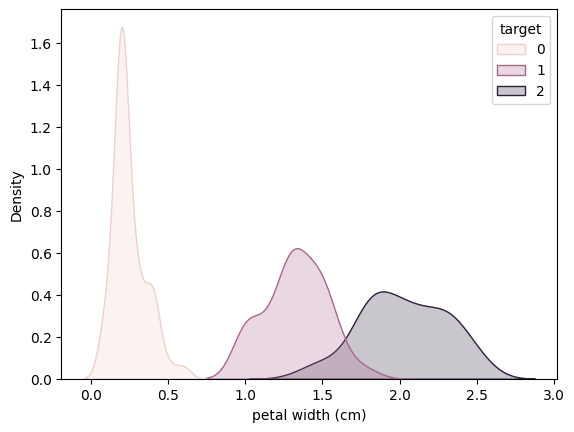

In [8]:
sns.kdeplot(data=df, x="petal width (cm)", hue="target", fill=True);

### Correlation matrix

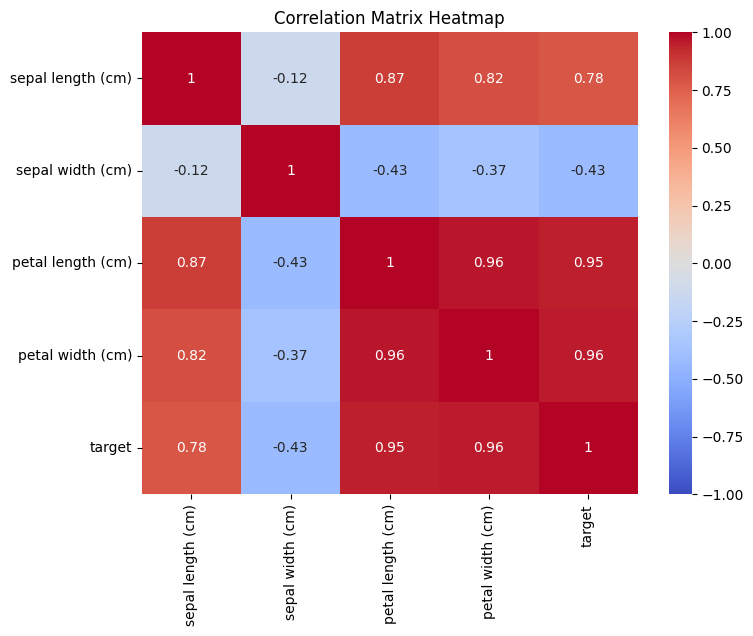

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Train test split

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# XGBoost model

In [11]:
from xgboost import XGBClassifier

# Train the XGBoost model
clf = XGBClassifier(n_estimators=500, objective='multi:softmax', num_class=3, max_depth=5, n_jobs=-1)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, num_class=3,
              num_parallel_tree=None, ...)

In [12]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

# Model evaluation

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Saving the model

In [15]:
import joblib

# Save the model to disk using joblib
joblib.dump(clf, '../model/iris_classifier.joblib')

['../model/iris_classifier1.joblib']